<a href="https://colab.research.google.com/github/rhemish/ML_and_RL_Projects/blob/main/Implementing%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing Neural Networks

**Date:** July 19, 2025

### **Problem Statement**

The goal of this task is to build and evaluate a neural network to classify handwritten digits (0–9) using the MNIST dataset. This is a multi-class classification task that involves training a feedforward neural network to recognize patterns in grayscale 28x28 pixel images and accurately predict the digit class.

**Assumptions**

* The input images are clean, well-centered, and pre-labeled.

* A feedforward architecture with ReLU activation and softmax output is sufficient to model the digit classification task.

* Overfitting may occur in deeper networks, so regularization (e.g., dropout) might be required.

**Constraints**

* Only the PyTorch deep learning library is to be used.

* The dataset is fixed to MNIST, containing 60,000 training images and 10,000 test images.

* Implementation must be done in Python, using Jupyter Notebook

* A specific range of architectures must be tested:

   * 1 and 2 hidden layers

   * 128 or 256 neurons per layer

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#Loading the dataset
train_dataset = MNIST(root='./data', train=True, download=True)
test_dataset = MNIST(root='./data', train=False, download=True)

#Normalization and reshaping
train_images = torch.tensor(train_dataset.data.view(-1, 28*28), dtype=torch.float32) / 255
train_labels = torch.tensor(train_dataset.targets, dtype=torch.long)
test_images = torch.tensor(test_dataset.data.view(-1, 28*28), dtype=torch.float32) / 255
test_labels = torch.tensor(test_dataset.targets, dtype=torch.long)

#Splitting into training and validation (80/20)
train_size = int(0.8 * len(train_images))
val_size = len(train_images) - train_size
train_images, val_images = torch.split(train_images, [train_size, val_size])
train_labels, val_labels = torch.split(train_labels, [train_size, val_size])

#Dataloaders with batch size of 32
train_loader = DataLoader(TensorDataset(train_images, train_labels), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(val_images, val_labels), batch_size=32)
test_loader = DataLoader(TensorDataset(test_images, test_labels), batch_size=32)


100%|██████████| 9.91M/9.91M [00:00<00:00, 48.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.62MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 12.7MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.07MB/s]
/tmp/ipython-input-3409435759.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_images = torch.tensor(train_dataset.data.view(-1, 28*28), dtype=torch.float32) / 255
/tmp/ipython-input-3409435759.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = torch.tensor(train_dataset.targets, dtype=torch.long)
/tmp/ipython-input-3409435759.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clon

In [ ]:
#Feedforward model with hidden layers set to be configurable
class ModelExperiment(nn.Module):
    def __init__(self, hidden_layers):
        super(ModelExperiment, self).__init__()
        layers = [nn.Linear(784, hidden_layers[0]), nn.ReLU()]
        for i in range(1, len(hidden_layers)):
            layers += [nn.Linear(hidden_layers[i-1], hidden_layers[i]), nn.ReLU()]
        layers += [nn.Linear(hidden_layers[-1], 10)]
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

model_configs = {
    "1HL_128": [128],
    "1HL_256": [256],
    "2HL_128": [128, 128],
    "2HL_256": [256, 256]
}

results = {}


In [ ]:
#Training and evaluating 4 base models: 1HL/2HL with 128 or 256 neurons
epochs = 15

for name, hidden_layers in model_configs.items():
    model = ModelExperiment(hidden_layers)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    train_accs, val_accs = [], []
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        correct, total_loss = 0, 0
        for x, y in train_loader:
            out = model(x)
            loss = criterion(out, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            correct += (out.argmax(dim=1) == y).sum().item()
        train_acc = correct / len(train_loader.dataset)
        train_accs.append(train_acc)
        train_losses.append(total_loss / len(train_loader))

        model.eval()
        correct, val_loss = 0, 0
        with torch.no_grad():
            for x, y in val_loader:
                out = model(x)
                val_loss += criterion(out, y).item()
                correct += (out.argmax(dim=1) == y).sum().item()
        val_acc = correct / len(val_loader.dataset)
        val_accs.append(val_acc)
        val_losses.append(val_loss / len(val_loader))

        print(f"{name} - Epoch {epoch+1}/{epochs}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

    results[name] = (train_accs, val_accs, train_losses, val_losses, model)


1HL_128 - Epoch 1/15, Train Acc: 0.9108, Val Acc: 0.9519
1HL_128 - Epoch 2/15, Train Acc: 0.9577, Val Acc: 0.9626
1HL_128 - Epoch 3/15, Train Acc: 0.9697, Val Acc: 0.9679
1HL_128 - Epoch 4/15, Train Acc: 0.9775, Val Acc: 0.9704
1HL_128 - Epoch 5/15, Train Acc: 0.9816, Val Acc: 0.9750
1HL_128 - Epoch 6/15, Train Acc: 0.9855, Val Acc: 0.9755
1HL_128 - Epoch 7/15, Train Acc: 0.9886, Val Acc: 0.9755
1HL_128 - Epoch 8/15, Train Acc: 0.9908, Val Acc: 0.9742
1HL_128 - Epoch 9/15, Train Acc: 0.9931, Val Acc: 0.9756
1HL_128 - Epoch 10/15, Train Acc: 0.9934, Val Acc: 0.9745
1HL_128 - Epoch 11/15, Train Acc: 0.9953, Val Acc: 0.9740
1HL_128 - Epoch 12/15, Train Acc: 0.9961, Val Acc: 0.9762
1HL_128 - Epoch 13/15, Train Acc: 0.9962, Val Acc: 0.9765
1HL_128 - Epoch 14/15, Train Acc: 0.9973, Val Acc: 0.9748
1HL_128 - Epoch 15/15, Train Acc: 0.9976, Val Acc: 0.9773
1HL_256 - Epoch 1/15, Train Acc: 0.9176, Val Acc: 0.9536
1HL_256 - Epoch 2/15, Train Acc: 0.9652, Val Acc: 0.9663
1HL_256 - Epoch 3/15, Tra

In [ ]:
#Applying dropout to improve generalization of the best-performing model (2HL_256)
class DropoutModel(nn.Module):
    def __init__(self):
        super(DropoutModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.model(x)

model = DropoutModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train_accs, val_accs, train_losses, val_losses = [], [], [], []
for epoch in range(15):
    model.train()
    correct, loss_total = 0, 0
    for x, y in train_loader:
        out = model(x)
        loss = criterion(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_total += loss.item()
        correct += (out.argmax(dim=1) == y).sum().item()
    train_accs.append(correct / len(train_loader.dataset))
    train_losses.append(loss_total / len(train_loader))

    model.eval()
    correct, val_loss = 0, 0
    with torch.no_grad():
        for x, y in val_loader:
            out = model(x)
            val_loss += criterion(out, y).item()
            correct += (out.argmax(dim=1) == y).sum().item()
    val_accs.append(correct / len(val_loader.dataset))
    val_losses.append(val_loss / len(val_loader))

    print(f"Dropout_2HL_256 - Epoch {epoch+1}/{15}, Train Acc: {train_accs[-1]:.4f}, Val Acc: {val_accs[-1]:.4f}")

results["Dropout_2HL_256"] = (train_accs, val_accs, train_losses, val_losses, model)


Dropout_2HL_256 - Epoch 1/15, Train Acc: 0.9035, Val Acc: 0.9598
Dropout_2HL_256 - Epoch 2/15, Train Acc: 0.9548, Val Acc: 0.9687
Dropout_2HL_256 - Epoch 3/15, Train Acc: 0.9652, Val Acc: 0.9708
Dropout_2HL_256 - Epoch 4/15, Train Acc: 0.9698, Val Acc: 0.9741
Dropout_2HL_256 - Epoch 5/15, Train Acc: 0.9743, Val Acc: 0.9749
Dropout_2HL_256 - Epoch 6/15, Train Acc: 0.9747, Val Acc: 0.9758
Dropout_2HL_256 - Epoch 7/15, Train Acc: 0.9788, Val Acc: 0.9762
Dropout_2HL_256 - Epoch 8/15, Train Acc: 0.9796, Val Acc: 0.9755
Dropout_2HL_256 - Epoch 9/15, Train Acc: 0.9818, Val Acc: 0.9789
Dropout_2HL_256 - Epoch 10/15, Train Acc: 0.9806, Val Acc: 0.9799
Dropout_2HL_256 - Epoch 11/15, Train Acc: 0.9822, Val Acc: 0.9778
Dropout_2HL_256 - Epoch 12/15, Train Acc: 0.9842, Val Acc: 0.9772
Dropout_2HL_256 - Epoch 13/15, Train Acc: 0.9840, Val Acc: 0.9788
Dropout_2HL_256 - Epoch 14/15, Train Acc: 0.9847, Val Acc: 0.9787
Dropout_2HL_256 - Epoch 15/15, Train Acc: 0.9857, Val Acc: 0.9800


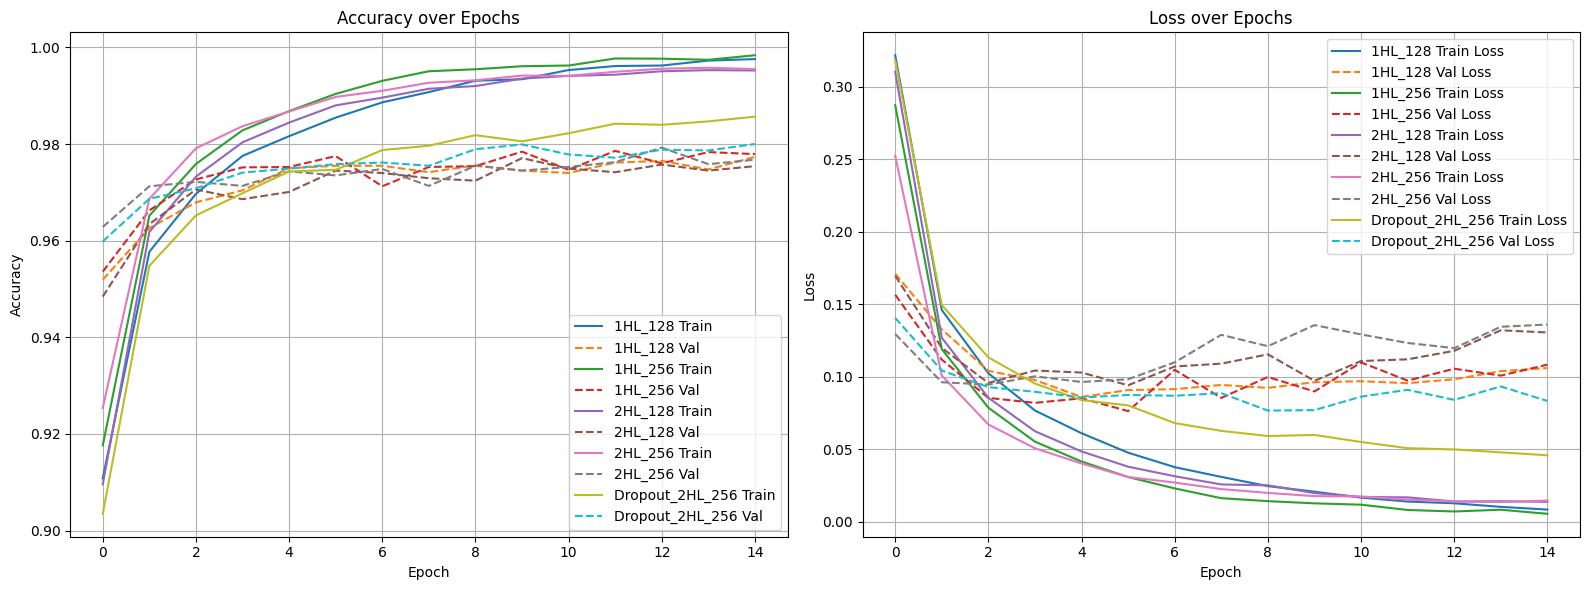

In [ ]:
#Accuracy and loss over epochs plots for all models to compare performance
plt.figure(figsize=(16, 6))
for name in results:
    train_acc, val_acc, train_loss, val_loss, _ = results[name]
    plt.subplot(1, 2, 1)
    plt.plot(train_acc, label=f"{name} Train")
    plt.plot(val_acc, linestyle="--", label=f"{name} Val")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy over Epochs")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label=f"{name} Train Loss")
    plt.plot(val_loss, linestyle="--", label=f"{name} Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss over Epochs")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


###**Analysis and Report**

**Training vs Validation Performance**:

* **1HL_128** and **1HL_256** show stable learning but lower overall accuracy which suggests underfitting due to limited capacity.

* **2HL_128** performs better but starts to slightly overfit after a few epochs, as validation loss rises.

* **2HL_256** achieves very high training accuracy, but overfits noticeably, with a gap between training and validation performance.

* **Dropout_2HL_256** improves generalization, validation accuracy stays high and stable, and loss steadily decreases.

**Effect of Layers and Neurons**:

Increasing neurons (**256 vs 128**) and layers (**2HL vs 1HL**) improves model capacity and training performance.

However, deeper and wider models are more prone to overfitting without regularization.

**Improvement Attempted**:

**Dropout** was added to the best-performing model (**2HL_256**) to reduce overfitting.

This led to the best validation accuracy across all models.

**Dropout_2HL_256** provided the best trade-off between model complexity and generalization.



Classification Report (Dropout_2HL_256):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Matrix:


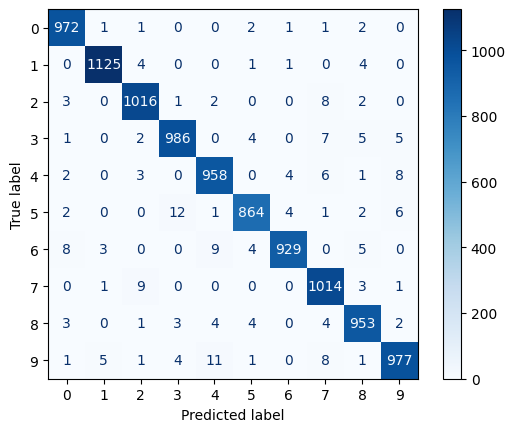

In [ ]:
#Evaluating the improved model (Dropout_2HL_256) on the test set
model = results["Dropout_2HL_256"][-1]
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for x, y in test_loader:
        out = model(x)
        preds = out.argmax(dim=1)
        all_preds.extend(preds.tolist())
        all_labels.extend(y.tolist())

print("Classification Report (Dropout_2HL_256):")
print(classification_report(all_labels, all_preds))

print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix(all_labels, all_preds))
disp.plot(cmap='Blues')
plt.show()


###**Summary: Evaluation of the Improved Model**

The final model was evaluated on the test dataset using accuracy, precision, recall, F1-score, and a confusion matrix.

* **Overall accuracy**: 0.98

* **Precision, recall, and F1-scores** were consistently high across all digit classes, showing strong and balanced performance.

* **Digits 1 and 2** were classified most accurately, with F1-scores of 0.99 and 0.98 respectively.

* **Minor misclassifications** occured between  digits like:
   * 5 and 3
   * 9 and 4
   * 7 and 2

The **confusion matrix** shows that most predictions fall on the diagonal, confirming strong generalization.

These results confirm that **Dropout_2HL_256** is the most effective model, achieving both high accuracy and robustness to overfitting.